# Instituto Tecnológico y de Estudios Superiores de Monterrey
## Maestría en Inteligencia Artificial Aplicada
### Proyecto Integrador (Gpo 10) - TC5035.10

### **Proyecto: Diseño Acelerado de Fármacos**

### Avance 3: Baseline

#### **Docentes:**
- Dra. Grettel Barceló Alonso - Profesor Titular
- Dr. Luis Eduardo Falcón Morales - Profesor Titular
- Dr. Horacio Martinez Alfaro  – Profesor Tutor

#### **Miembros del equipo:**
 - Jose Luis Artigas Arroyo - A01794906
 - José Luis Fabela Portillo - A00748551
 - Alejandro Emmanuel Silva Ortega - A01794545

In [1]:
# Importar librerias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import seaborn as sns
from sklearn.model_selection import train_test_split
import lazypredict
from lazypredict.Supervised import LazyClassifier
from sklearn.model_selection import train_test_split
import xgboost as xgb
from sklearn.metrics import matthews_corrcoef
from Bio import SeqIO
import re

In [2]:
X = pd.read_csv('../data/processed/pca_pfeatures.csv')
y = pd.read_csv('../data/processed/VEGF_y.csv')

In [3]:
y.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2704 entries, 0 to 2703
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   label   2704 non-null   int64
dtypes: int64(1)
memory usage: 21.2 KB


In [4]:

print(X.shape)
print(y.shape)

(2704, 20)
(2704, 1)


# Separar datasets en train y test

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state =42, stratify=y)
X_test, X_val, y_test, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state =4, stratify=y_train)


# Comparar modelos usando lazypredict

In [6]:
from sklearn.metrics import r2_score

In [13]:
# Defines and builds the lazyclassifier
clf = LazyClassifier(verbose=0,ignore_warnings=True, custom_metric=matthews_corrcoef)
models_train,predictions_train = clf.fit(X_train, X_train, y_train, y_train)

100%|██████████| 31/31 [00:02<00:00, 11.77it/s]

[LightGBM] [Info] Number of positive: 14, number of negative: 2149
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000209 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 5100
[LightGBM] [Info] Number of data points in the train set: 2163, number of used features: 20
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.006472 -> initscore=-5.033701
[LightGBM] [Info] Start training from score -5.033701
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, be

In [14]:
models_train

,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,matthews_corrcoef,Time Taken
Model,,,,,,
AdaBoostClassifier,1.00,1.00,1.00,1.00,1.00,0.42
ExtraTreesClassifier,1.00,1.00,1.00,1.00,1.00,0.15
XGBClassifier,1.00,1.00,1.00,1.00,1.00,0.08
RandomForestClassifier,1.00,1.00,1.00,1.00,1.00,0.29
QuadraticDiscriminantAnalysis,1.00,1.00,1.00,1.00,1.00,0.02
LabelSpreading,1.00,1.00,1.00,1.00,1.00,0.40
LabelPropagation,1.00,1.00,1.00,1.00,1.00,0.38
LGBMClassifier,1.00,1.00,1.00,1.00,1.00,0.13
ExtraTreeClassifier,1.00,1.00,1.00,1.00,1.00,0.02


In [9]:
models_test,predictions_test = clf.fit(X_train, X_test, y_train, y_test)

'tuple' object has no attribute '__name__'
Invalid Classifier(s)


100%|██████████| 31/31 [00:02<00:00, 12.28it/s]

[LightGBM] [Info] Number of positive: 14, number of negative: 2149
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000302 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 5100
[LightGBM] [Info] Number of data points in the train set: 2163, number of used features: 20
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.006472 -> initscore=-5.033701
[LightGBM] [Info] Start training from score -5.033701
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, be

In [10]:
models_test

,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,r2_score,Time Taken
Model,,,,,,
AdaBoostClassifier,1.00,1.00,1.00,1.00,1.00,0.42
ExtraTreesClassifier,1.00,1.00,1.00,1.00,1.00,0.13
XGBClassifier,1.00,1.00,1.00,1.00,1.00,0.08
RandomForestClassifier,1.00,1.00,1.00,1.00,1.00,0.29
QuadraticDiscriminantAnalysis,1.00,1.00,1.00,1.00,1.00,0.02
LabelSpreading,1.00,1.00,1.00,1.00,1.00,0.42
LabelPropagation,1.00,1.00,1.00,1.00,1.00,0.32
LGBMClassifier,1.00,1.00,1.00,1.00,1.00,0.11
ExtraTreeClassifier,1.00,1.00,1.00,1.00,1.00,0.02


[(0.0, 1.0)]

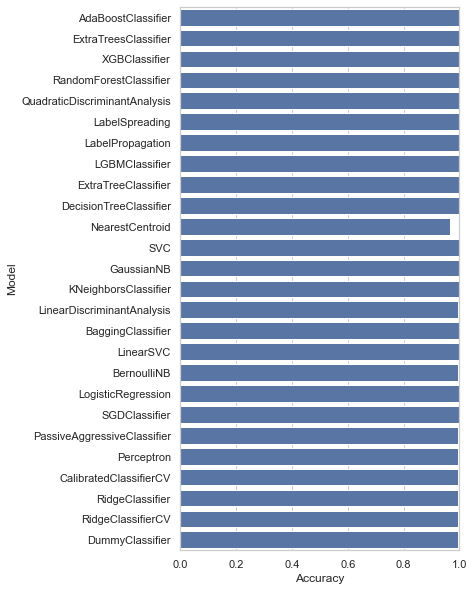

In [11]:
# Plot of Accuracy
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(5, 10))
sns.set_theme(style="whitegrid")
ax = sns.barplot(y=models_train.index, x="Accuracy", data=models_train)
ax.set(xlim=(0, 1))

In [12]:
# Plot of MCC
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(5, 10))
sns.set_theme(style="whitegrid")
ax = sns.barplot(y=models_train.index, x="matthews_corrcoef", data=models_train)
ax.set(xlim=(0, 1))

ValueError: Could not interpret value `matthews_corrcoef` for `x`. An entry with this name does not appear in `data`.

<Figure size 360x720 with 0 Axes>